In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
ruta_del_archivo = '/content/drive/MyDrive/Coffe_sales.csv'
df = pd.read_csv(ruta_del_archivo)
print(df.head())

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  


In [4]:
import pandas as pd

# Cargar el archivo
df = pd.read_csv('/content/drive/MyDrive/Coffe_sales.csv')

# Primeras filas
print(df.head())

# Información general
print(df.info())

# Estadísticas descriptivas
print(df.describe())

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----

In [5]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar o imputar nulos (ejemplo: eliminar)
df = df.dropna()

# Duplicados

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


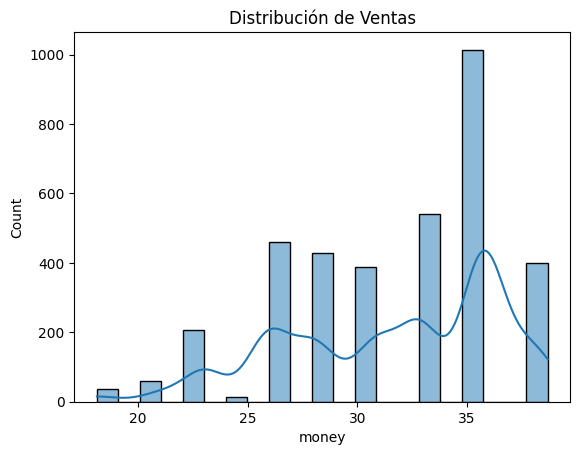

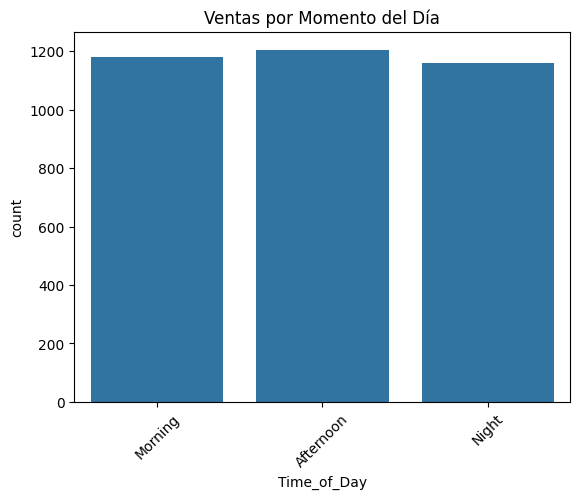

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de ventas
sns.histplot(df['money'], kde=True)
plt.title('Distribución de Ventas')
plt.show()

# Conteo por región
sns.countplot(x='Time_of_Day', data=df)
plt.title('Ventas por Momento del Día')
plt.xticks(rotation=45)
plt.show()

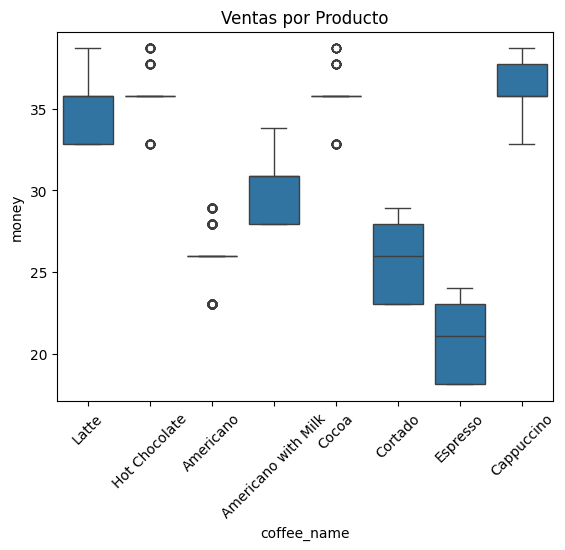

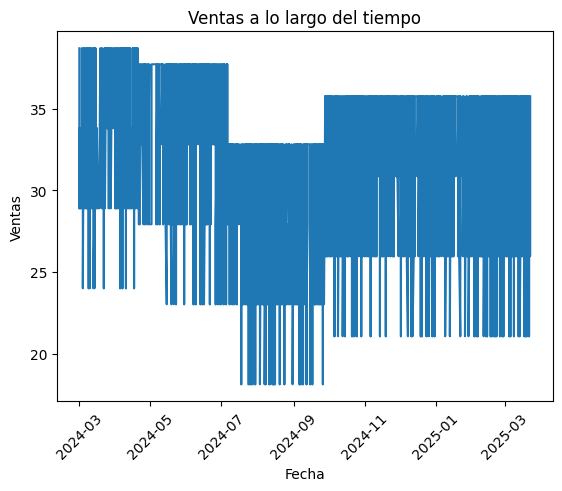

In [7]:
# Ventas por producto
sns.boxplot(x='coffee_name', y='money', data=df)
plt.title('Ventas por Producto')
plt.xticks(rotation=45)
plt.show()

# Relación entre fecha y ventas
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
plt.plot(df['Date'], df['money'])
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

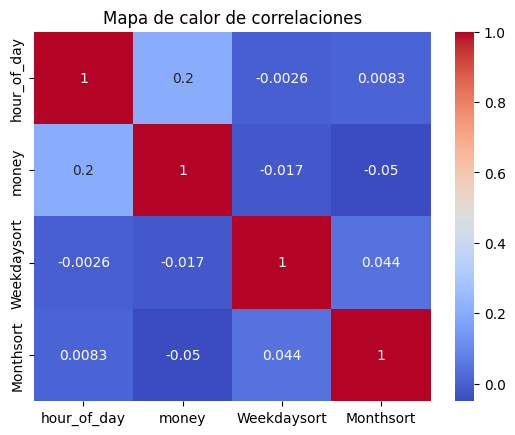

In [9]:
# Si hay variables numéricas adicionales
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

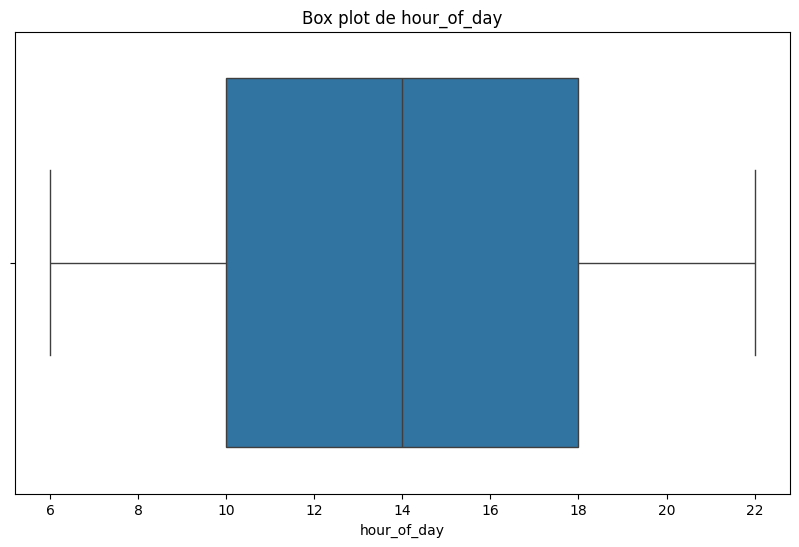

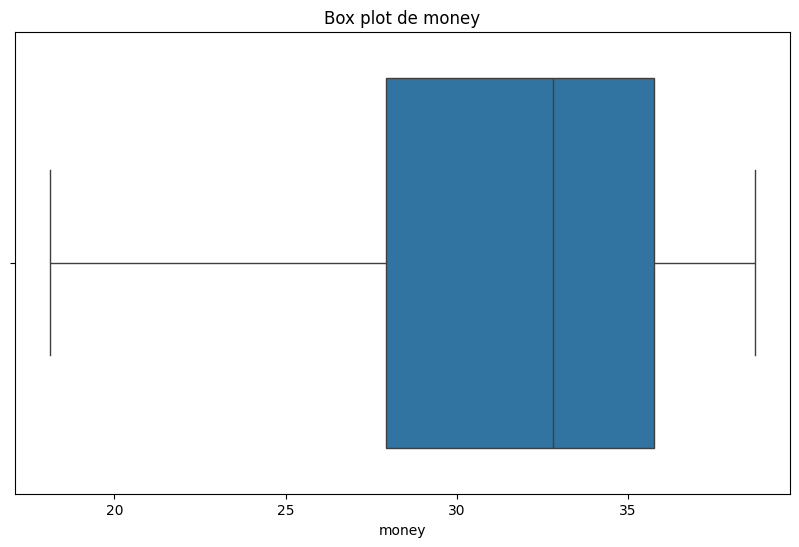

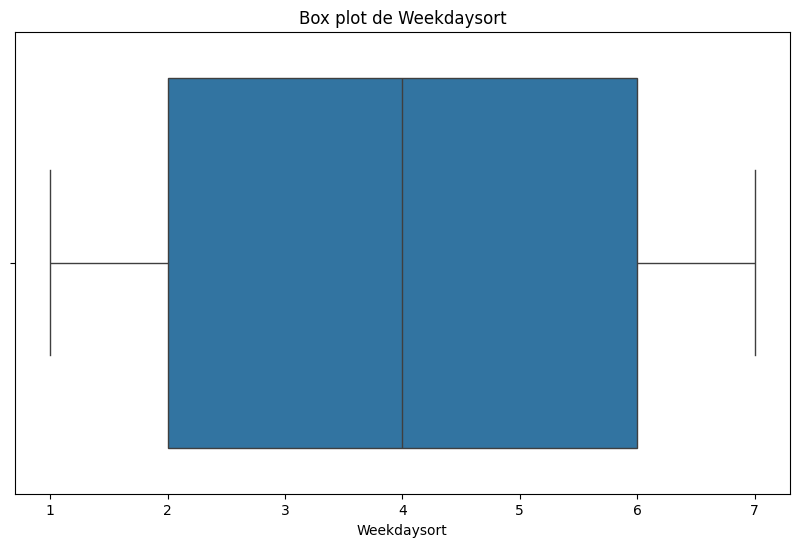

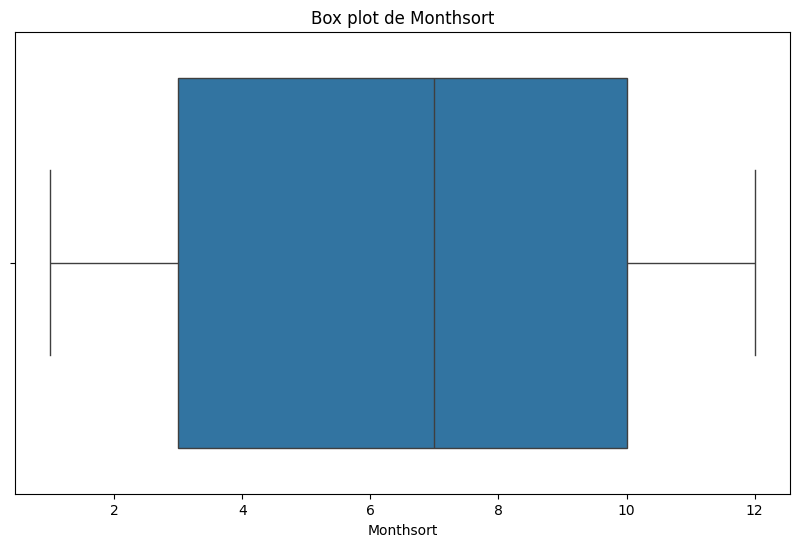

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot de {col}')
    plt.show()

In [11]:
print(df.describe())

categorical_cols = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

       hour_of_day        money  Weekdaysort    Monthsort  \
count  3547.000000  3547.000000  3547.000000  3547.000000   
mean     14.185791    31.645216     3.845785     6.453905   
min       6.000000    18.120000     1.000000     1.000000   
25%      10.000000    27.920000     2.000000     3.000000   
50%      14.000000    32.820000     4.000000     7.000000   
75%      18.000000    35.760000     6.000000    10.000000   
max      22.000000    38.700000     7.000000    12.000000   
std       4.234010     4.877754     1.971501     3.500754   

                                Date  
count                           3547  
mean   2024-10-04 17:34:43.676346368  
min              2024-03-01 00:00:00  
25%              2024-07-17 12:00:00  
50%              2024-10-10 00:00:00  
75%              2025-01-11 00:00:00  
max              2025-03-23 00:00:00  
std                              NaN  

Value counts for cash_type:
cash_type
card    3547
Name: count, dtype: int64

Value counts for cof

In [12]:
print("Hallazgos de valores atípicos e inconsistencias:")
print("\nColumnas numéricas:")
print("Según los box plots y las estadísticas descriptivas:")
print("- hour_of_day: No se observan valores atípicos significativos. El rango de 6 a 22 parece razonable para las horas del día.")
print("- money: Se observan algunos valores atípicos por debajo del rango principal. Estos podrían ser ventas inusualmente bajas y deberían ser investigados si impactan el análisis. Sin embargo, no se realizará ninguna eliminación o transformación en este subtask.")
print("- Weekdaysort: No se observan valores atípicos. El rango de 1 a 7 es consistente con los días de la semana.")
print("- Monthsort: No se observan valores atípicos. El rango de 1 a 12 es consistente con los meses del año.")

print("\nColumnas categóricas:")
print("Según los value counts:")
print("- cash_type: Solo contiene la categoría 'card'. No hay inconsistencias aparentes.")
print("- coffee_name: Las categorías parecen ser nombres de café válidos y no se observan inconsistencias en la entrada de datos.")
print("- Time_of_Day: Las categorías 'Afternoon', 'Morning' y 'Night' son consistentes.")
print("- Weekday: Los nombres de los días de la semana son consistentes.")
print("- Month_name: Los nombres de los meses son consistentes.")

Hallazgos de valores atípicos e inconsistencias:

Columnas numéricas:
Según los box plots y las estadísticas descriptivas:
- hour_of_day: No se observan valores atípicos significativos. El rango de 6 a 22 parece razonable para las horas del día.
- money: Se observan algunos valores atípicos por debajo del rango principal. Estos podrían ser ventas inusualmente bajas y deberían ser investigados si impactan el análisis. Sin embargo, no se realizará ninguna eliminación o transformación en este subtask.
- Weekdaysort: No se observan valores atípicos. El rango de 1 a 7 es consistente con los días de la semana.
- Monthsort: No se observan valores atípicos. El rango de 1 a 12 es consistente con los meses del año.

Columnas categóricas:
Según los value counts:
- cash_type: Solo contiene la categoría 'card'. No hay inconsistencias aparentes.
- coffee_name: Las categorías parecen ser nombres de café válidos y no se observan inconsistencias en la entrada de datos.
- Time_of_Day: Las categorías 'Af

In [13]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week and month
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# Create the 'Hour_Group' column
def hour_to_group(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night' # Assuming hours outside 6-22 are night

df['Hour_Group'] = df['hour_of_day'].apply(hour_to_group)

# Display the updated dataframe with new columns
display(df.head())

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Day_of_Week,Month,Hour_Group
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,Friday,March,Morning
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000,Friday,March,Evening
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000,Friday,March,Evening
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000,Friday,March,Evening
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000,Friday,March,Afternoon


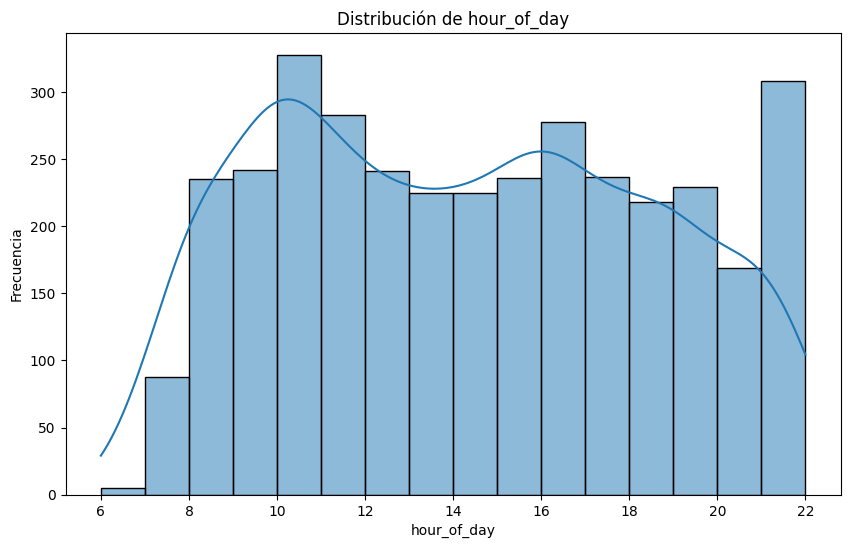

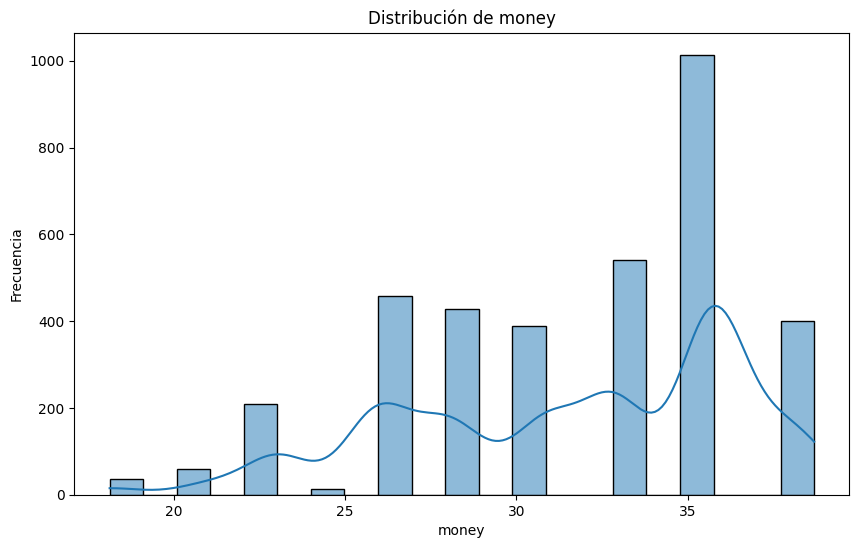

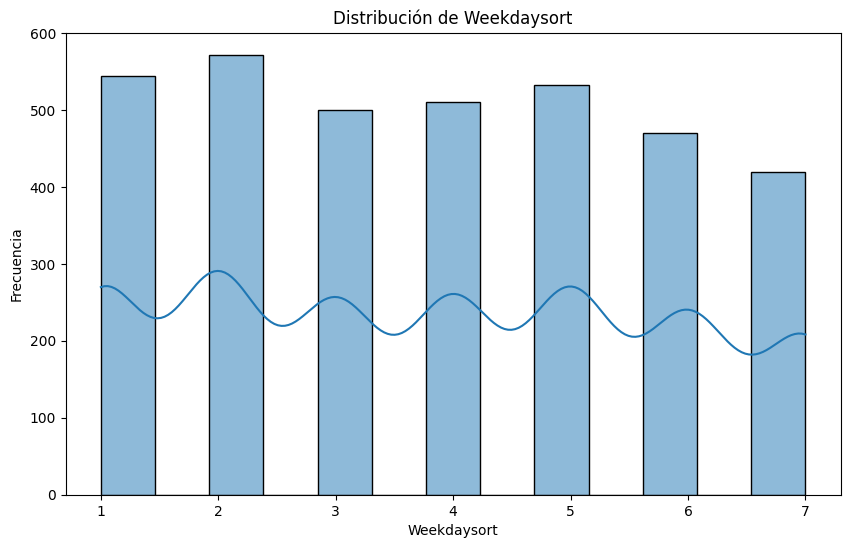

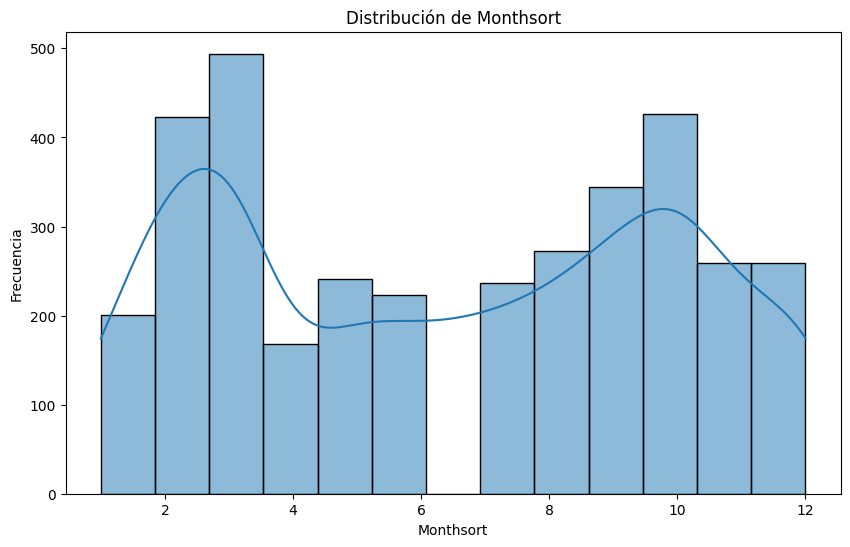

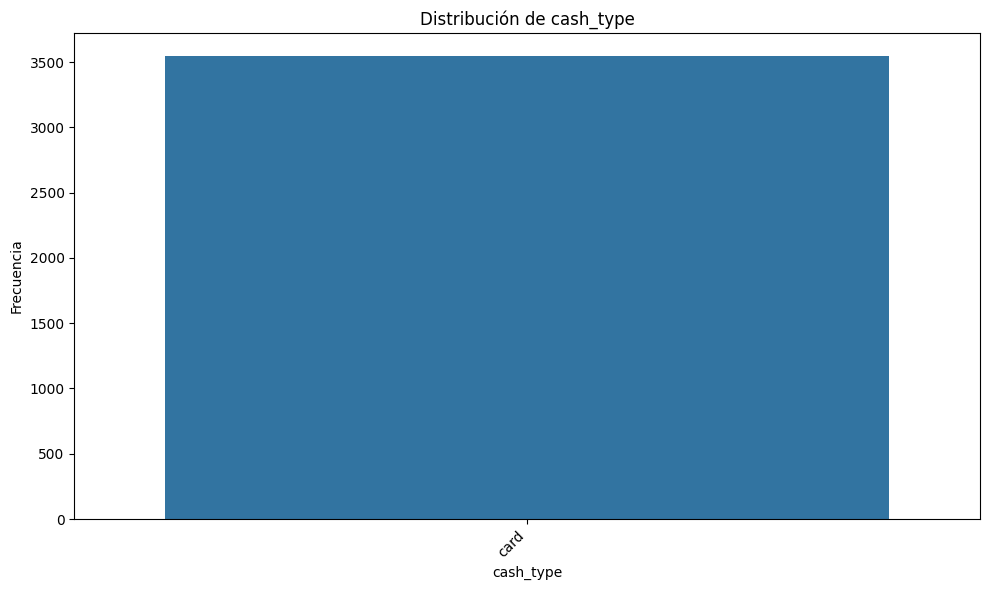

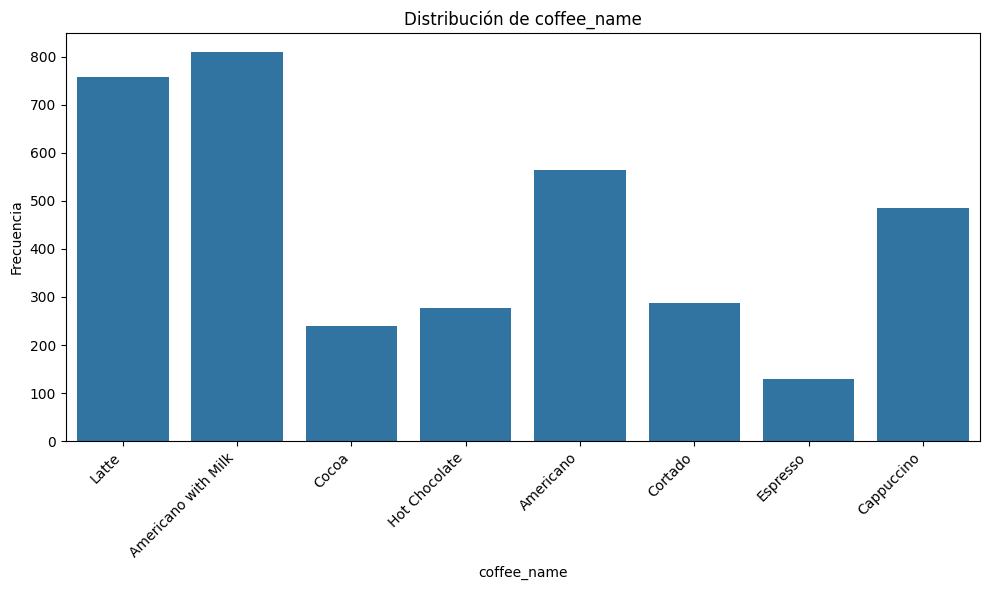

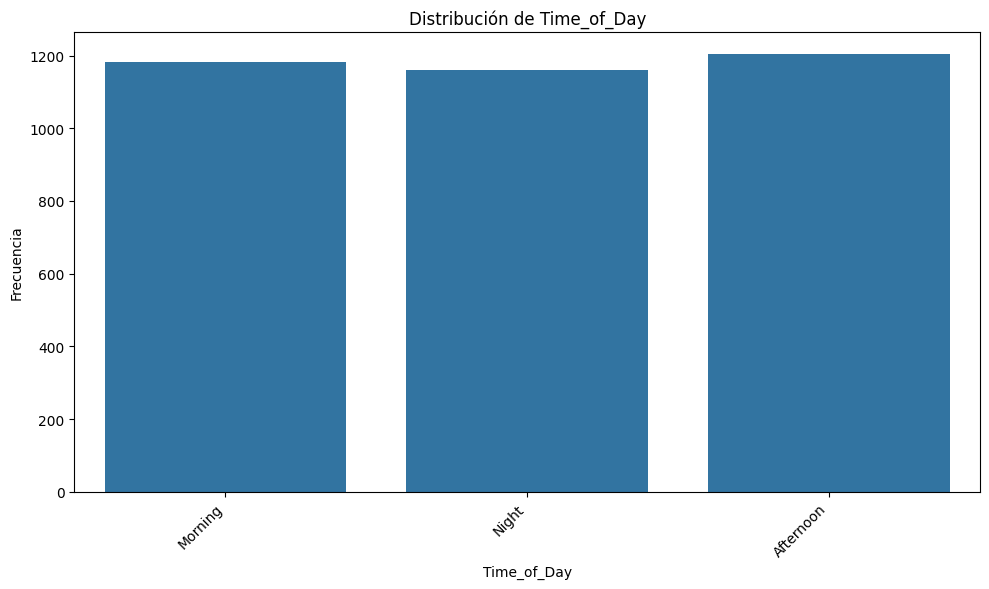

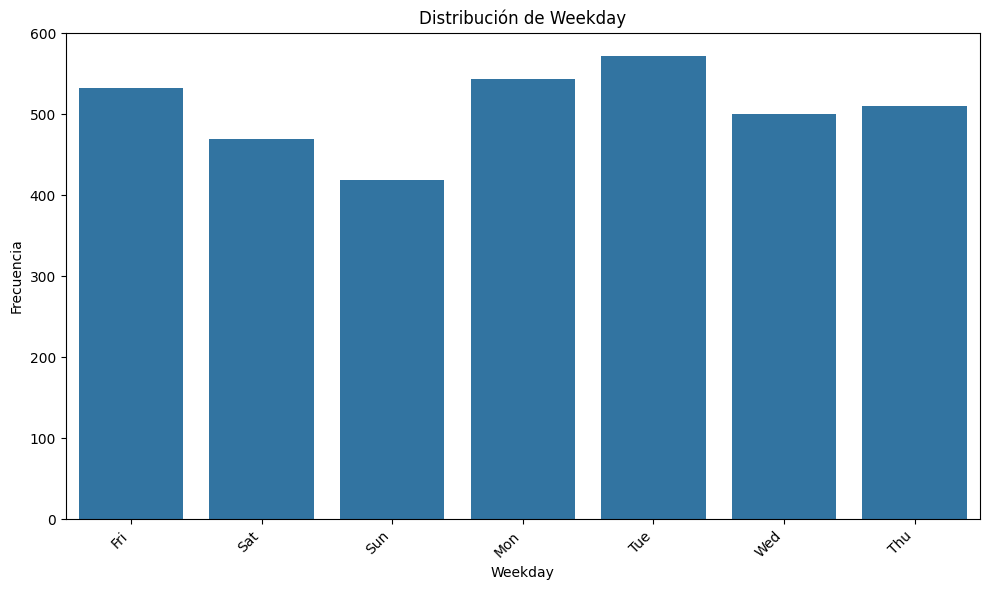

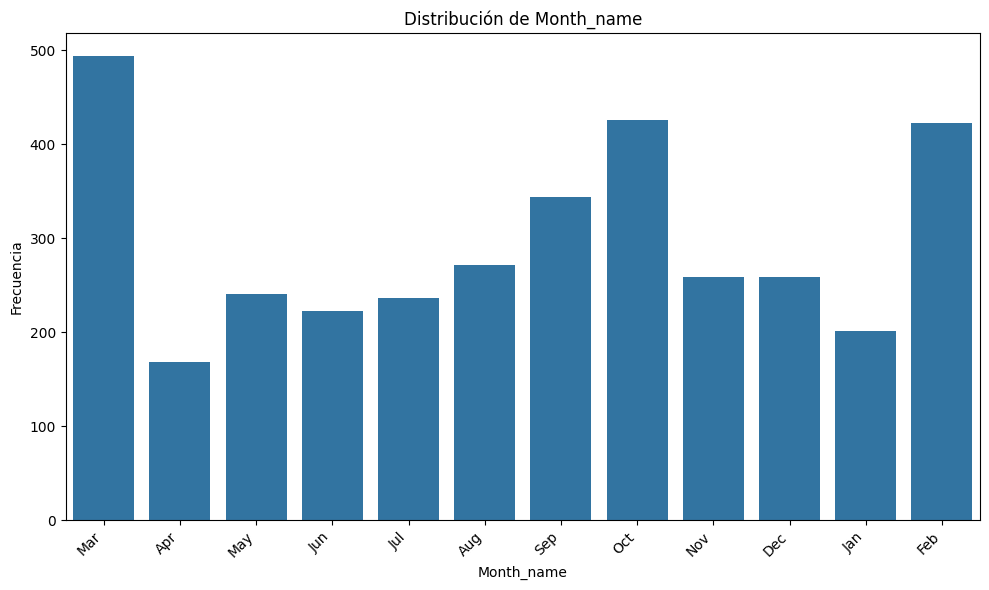

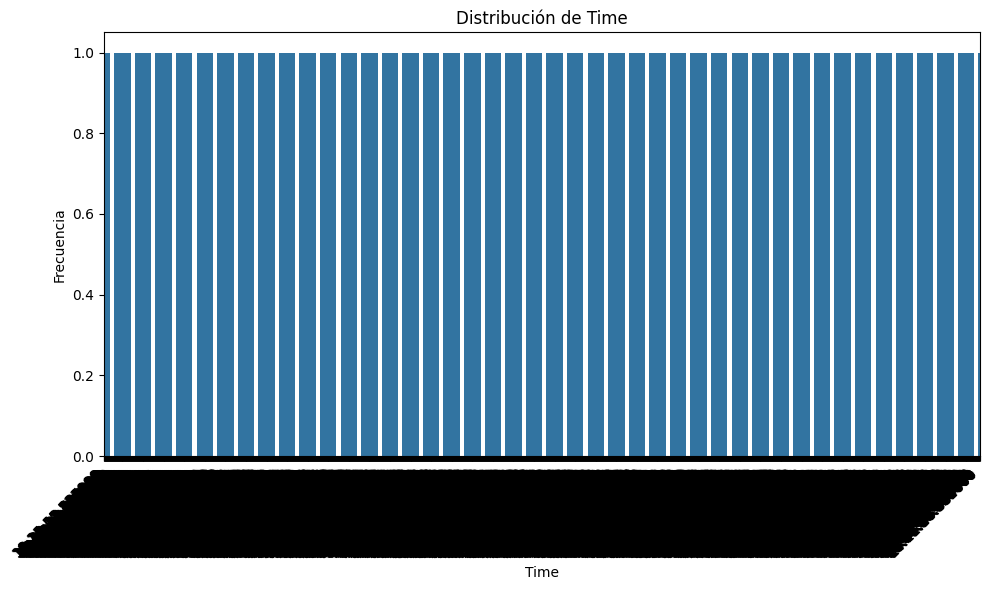

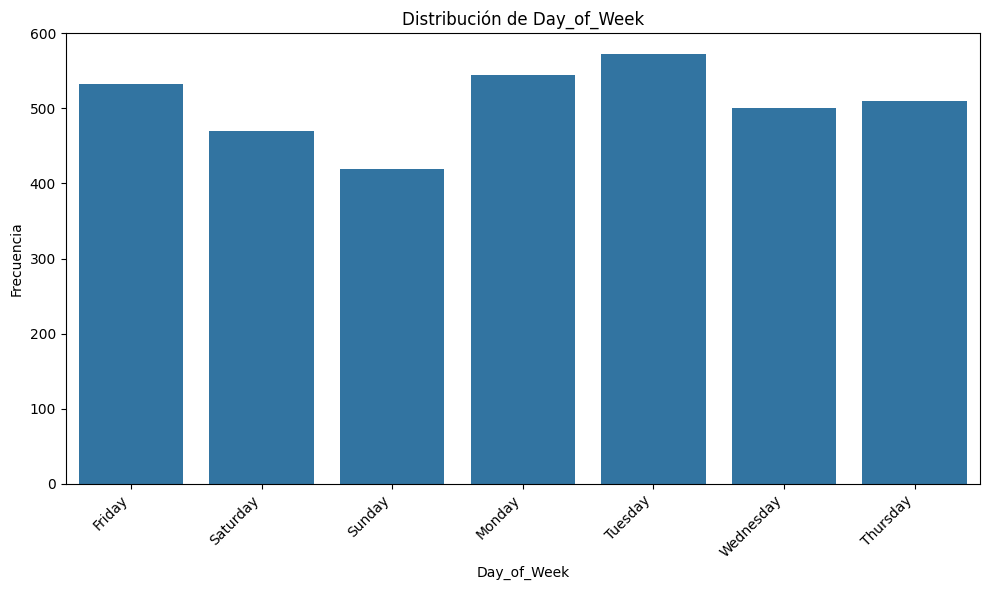

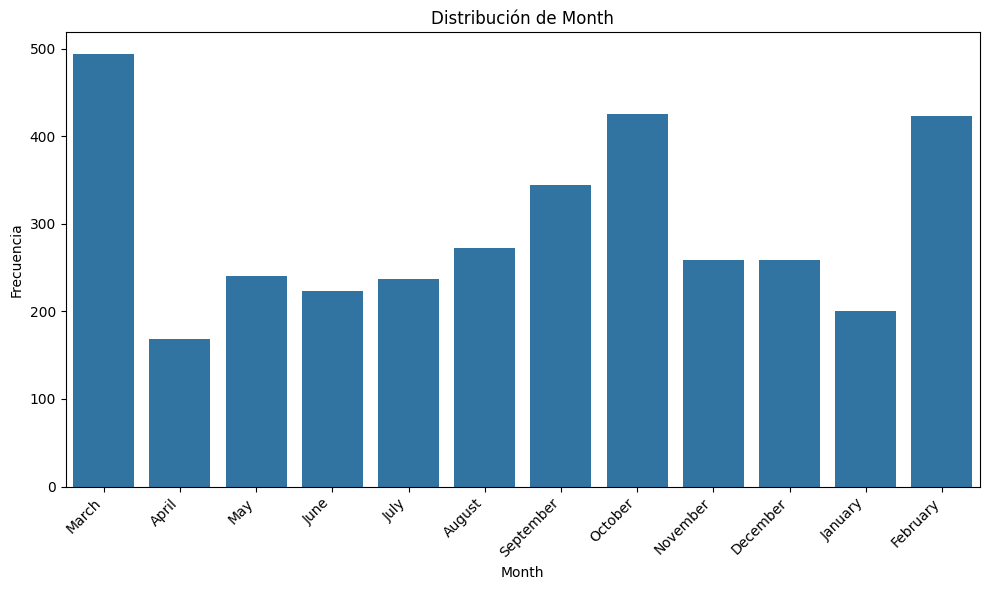

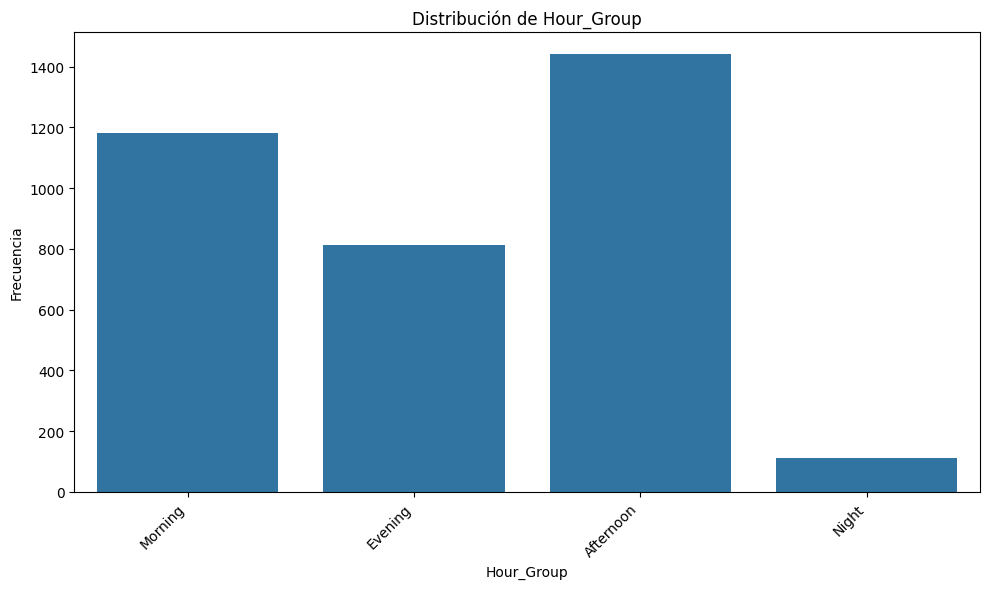

In [16]:
#analisis univariado.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Análisis bivariado




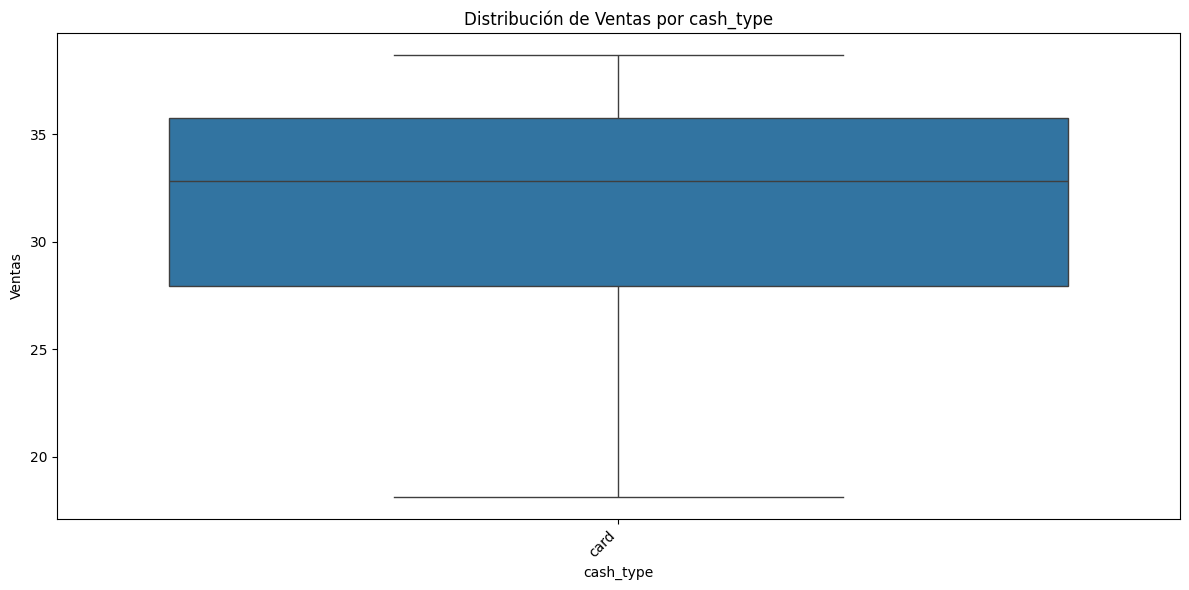

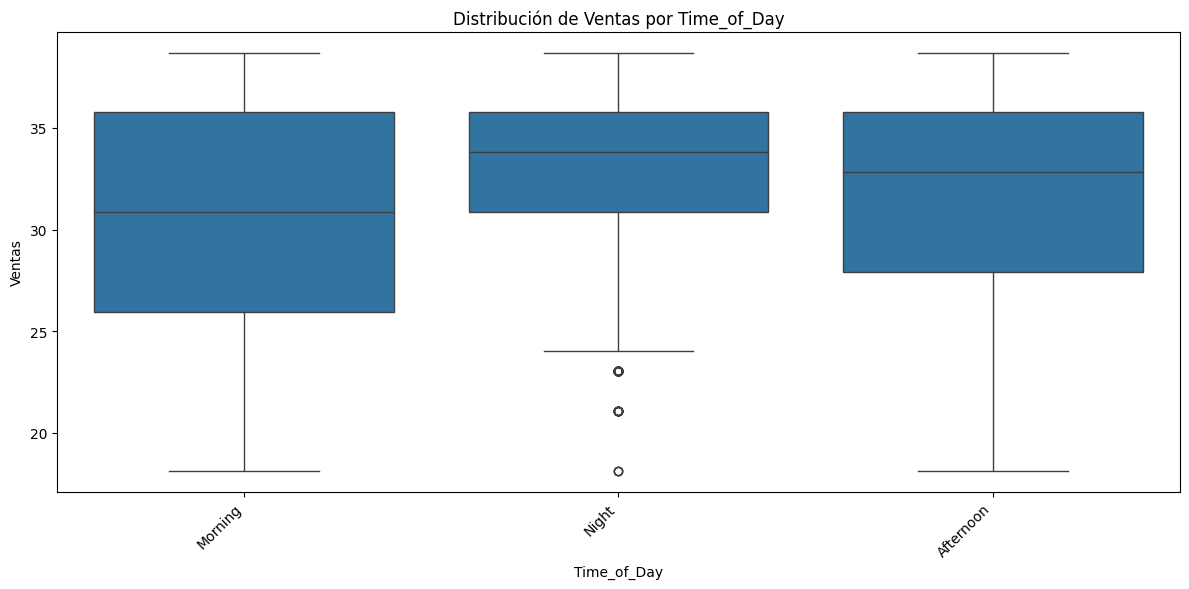

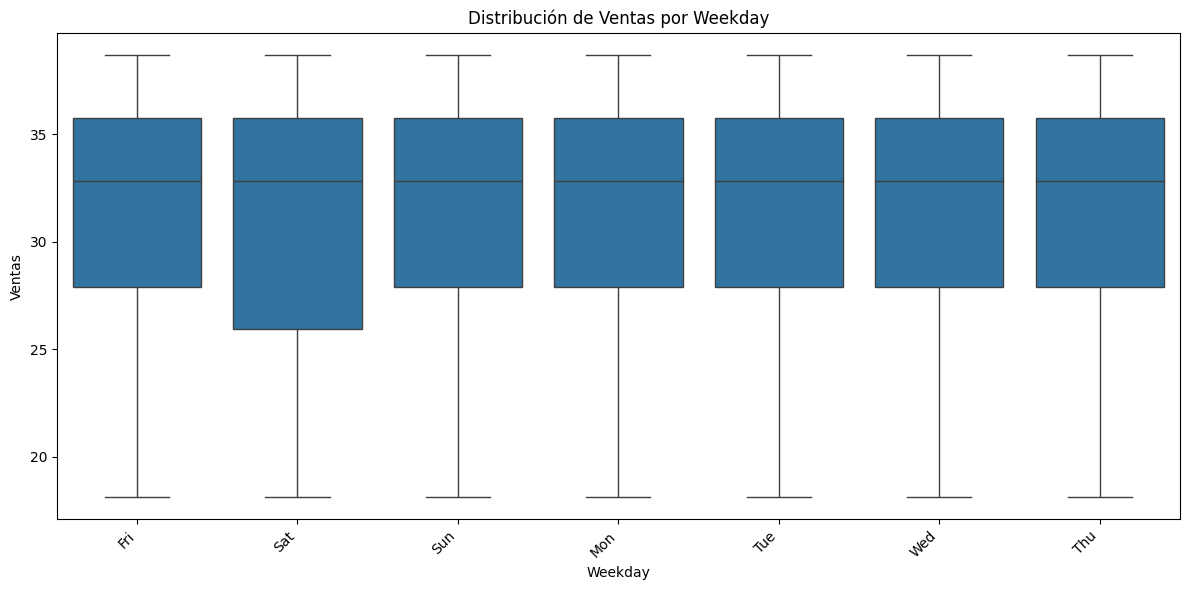

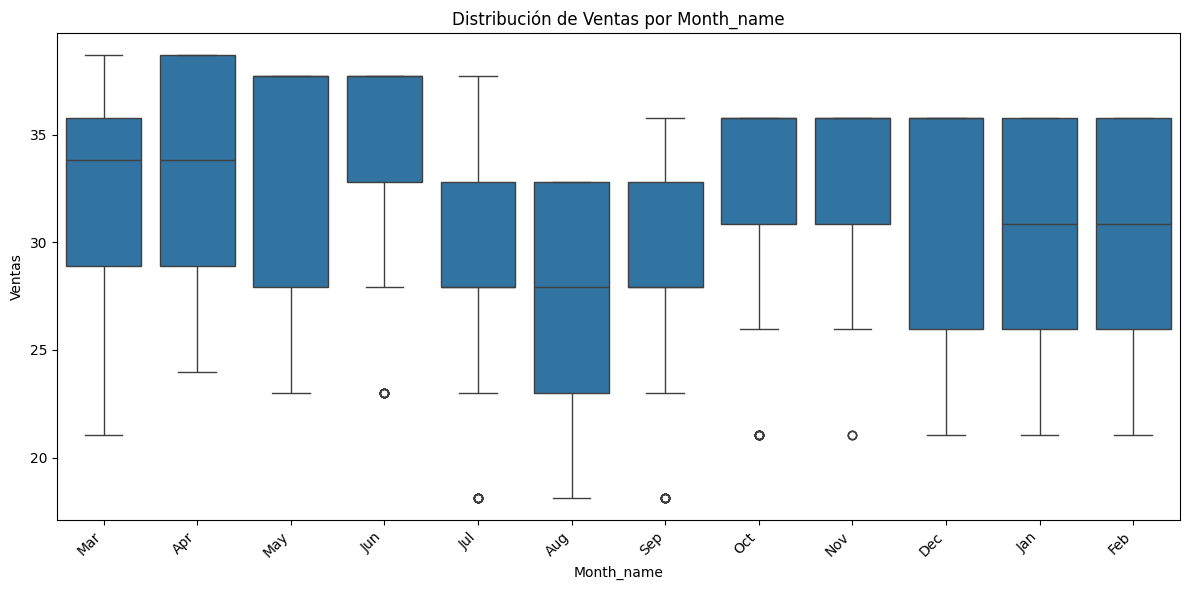

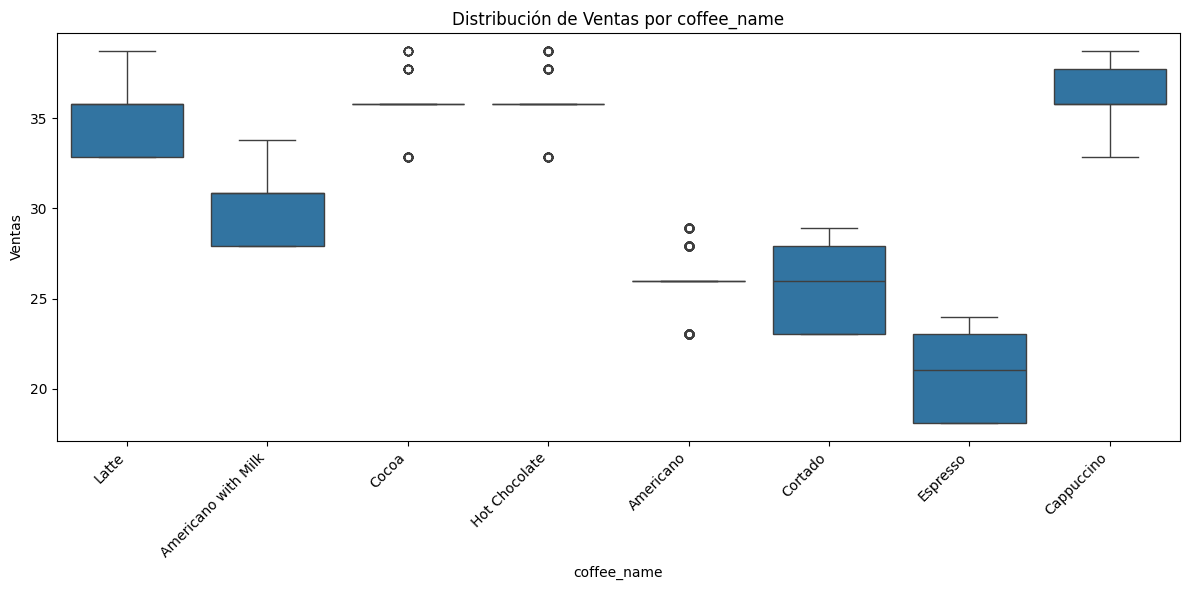

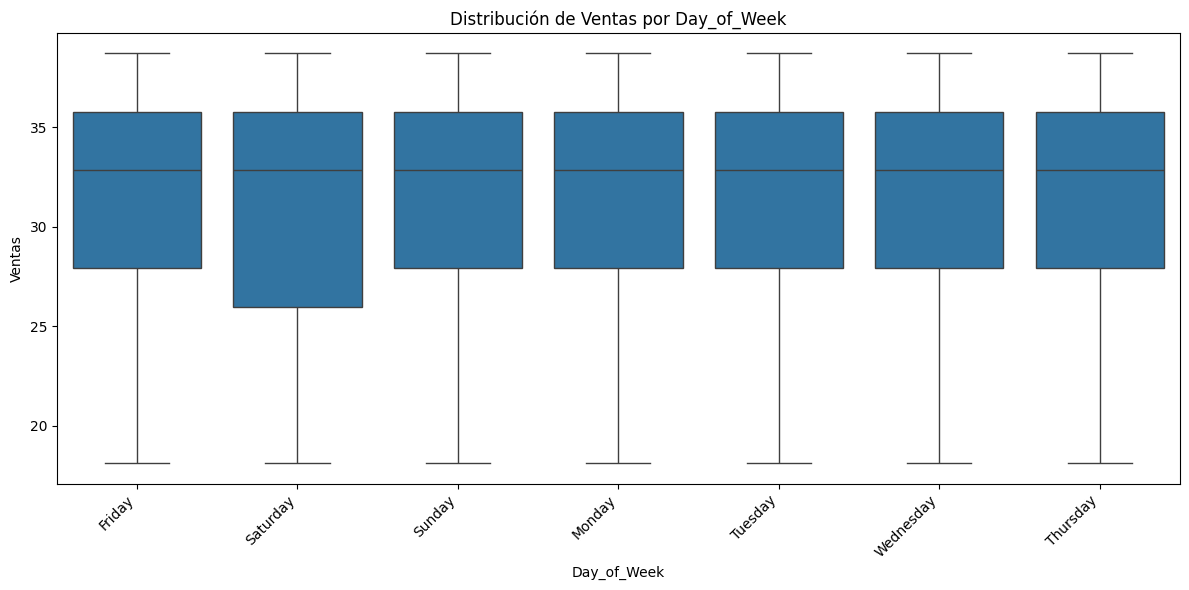

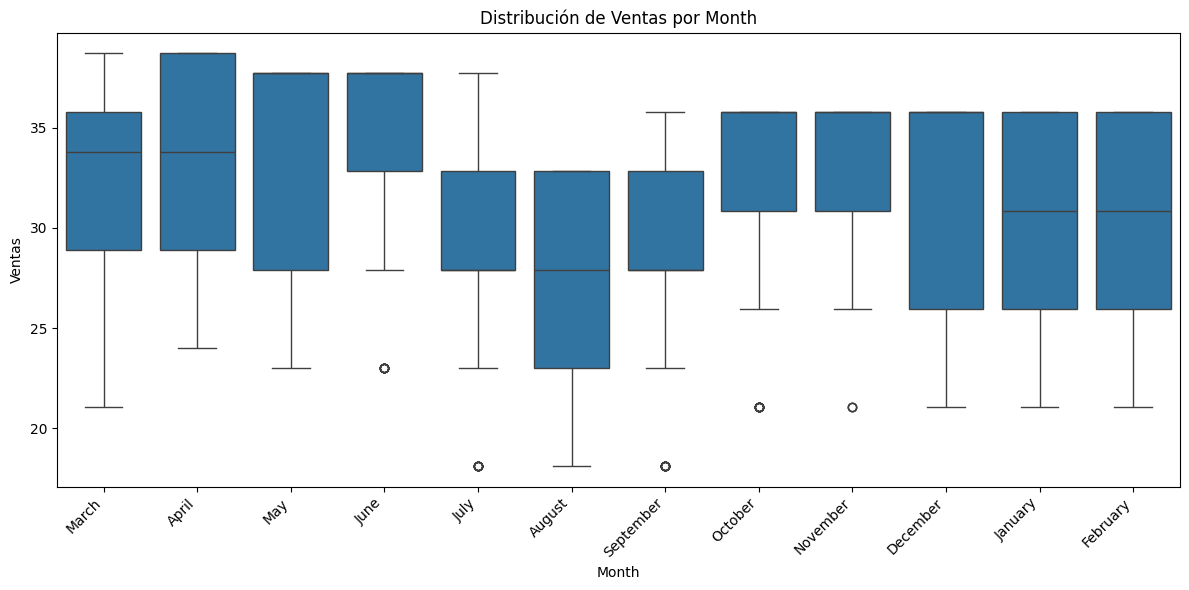

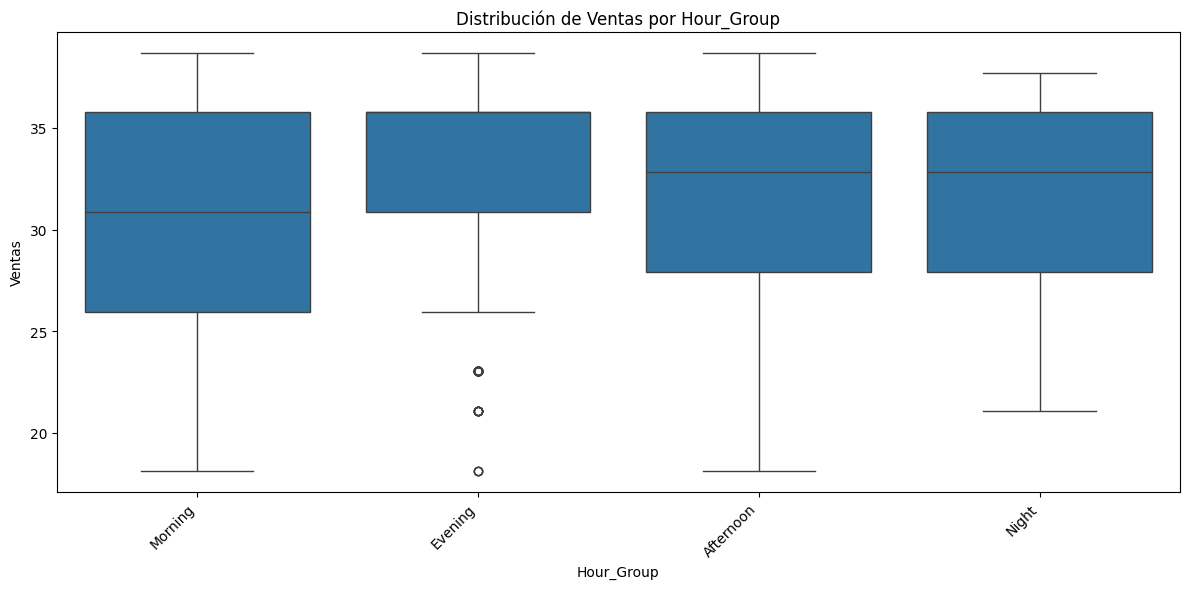

In [15]:
categorical_vars = ['cash_type', 'Time_of_Day', 'Weekday', 'Month_name', 'coffee_name', 'Day_of_Week', 'Month', 'Hour_Group']

for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='money', data=df)
    plt.title(f'Distribución de Ventas por {var}')
    plt.xlabel(var)
    plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

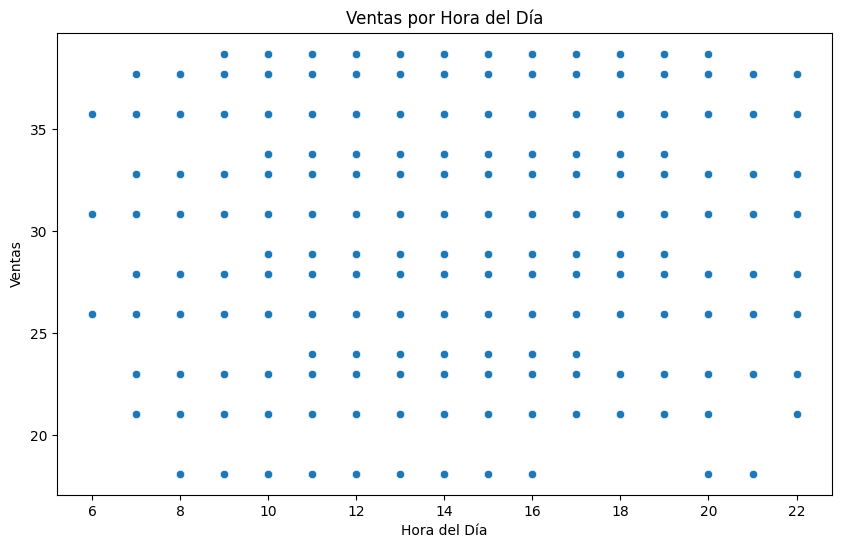

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour_of_day', y='money', data=df)
plt.title('Ventas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Ventas')
plt.show()

## Análisis multivariado


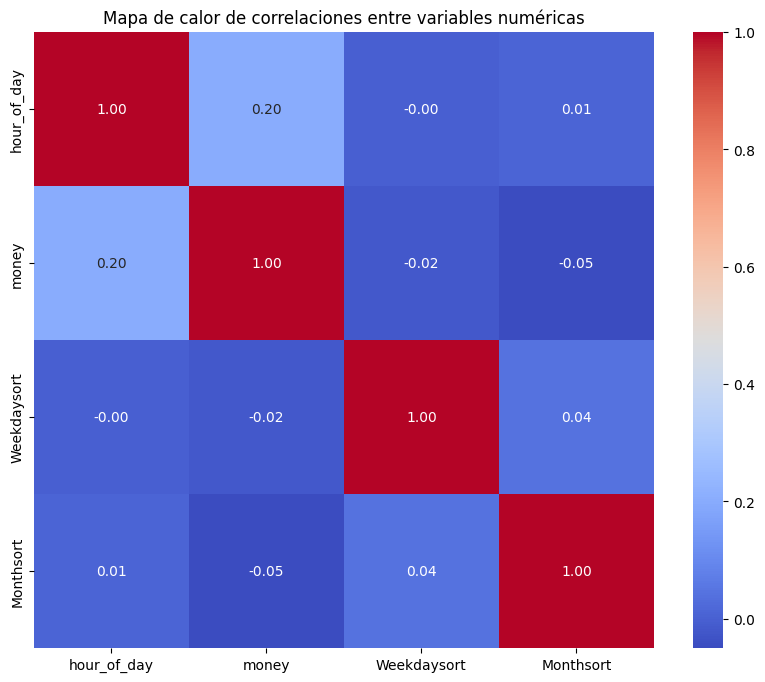

In [18]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

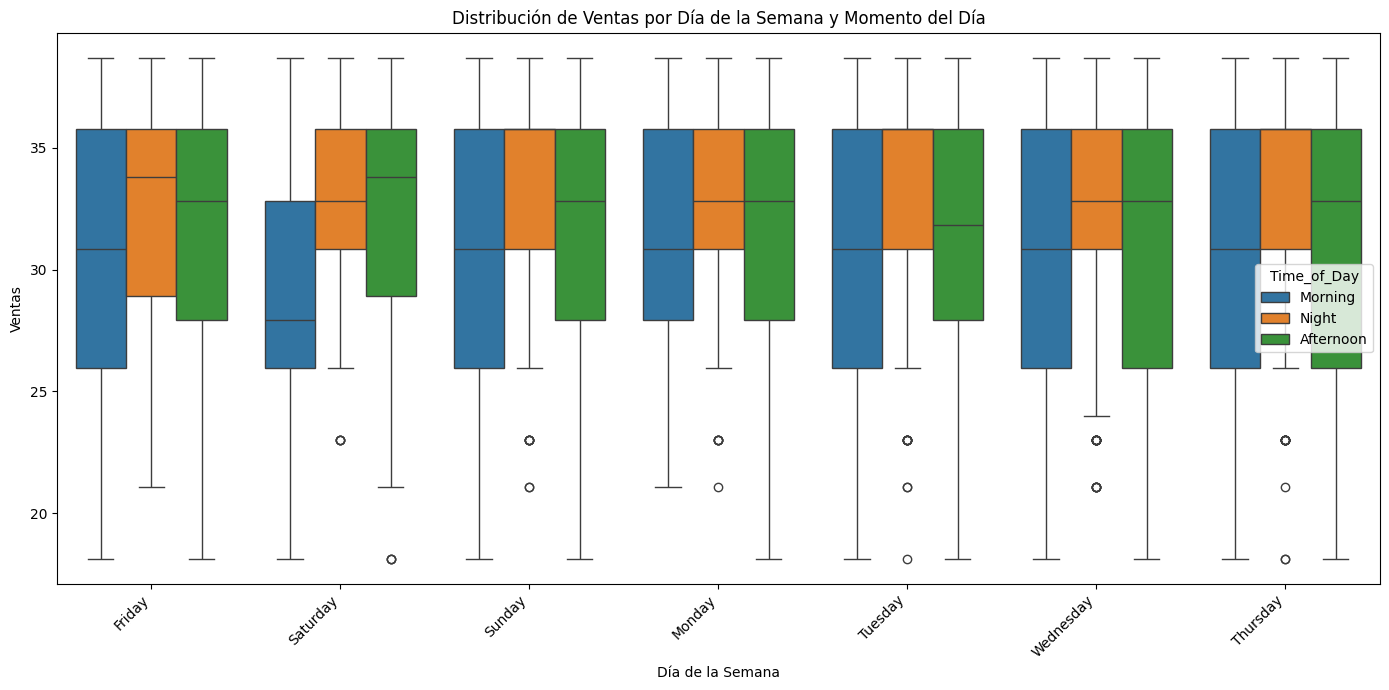

In [19]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Day_of_Week', y='money', hue='Time_of_Day', data=df)
plt.title('Distribución de Ventas por Día de la Semana y Momento del Día')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Create a scatter plot with color encoding to examine the relationship between 'hour_of_day', 'money', and 'Time_of_Day'.



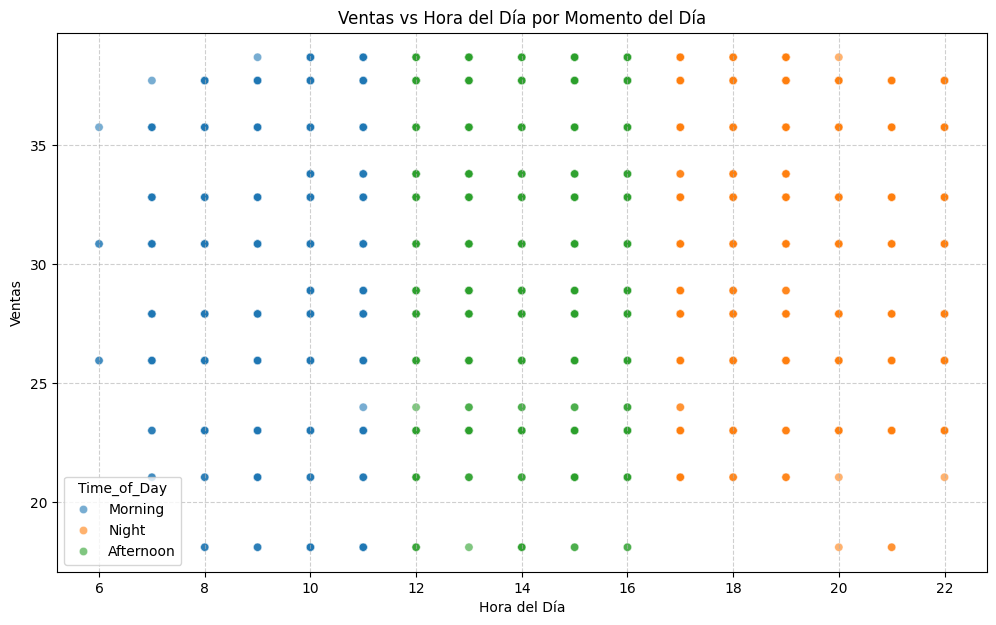

In [20]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='hour_of_day', y='money', hue='Time_of_Day', data=df, alpha=0.6)
plt.title('Ventas vs Hora del Día por Momento del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Ventas')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Análisis temporal




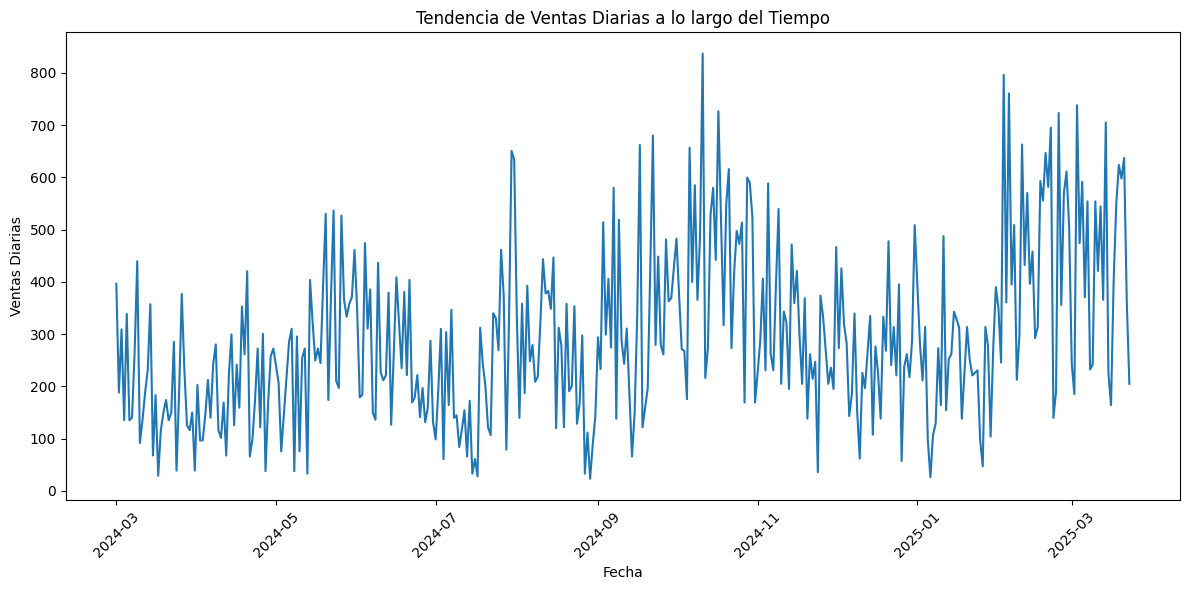

In [21]:
# Ensure the 'Date' column is of type datetime.
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by 'Date' and calculate the sum of 'money' for each day.
daily_sales = df.groupby('Date')['money'].sum().reset_index()

# Create a line plot to visualize the trend of sales over time.
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['money'])

# Add title and labels in Spanish.
plt.title('Tendencia de Ventas Diarias a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Diarias')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot.
plt.tight_layout()
plt.show()